In [1]:
import tensorflow as tf

In [2]:
for gpu in tf.config.experimental.list_physical_devices("GPU"):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

In [59]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, LeakyReLU, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [5]:
train_data = train_data/255.
test_data = test_data/255.

In [6]:
val_data = train_data[:5000]
val_labels = train_labels[:5000]
train_data = train_data[5000:]
train_labels = train_labels[5000:]

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

In [99]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(200,activation="relu")(x)
x = Dense(150,activation="relu")(x)
output_layer = Dense(10,activation="softmax")(x)
model = Model(input_layer, output_layer)

In [100]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_21 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [19]:
history = model.fit(train_data,
                    train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_data=(val_data,val_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 1s 32us/sample - loss: 1.8771 - accuracy: 0.3234 - val_loss: 1.7497 - val_accuracy: 0.3628
Epoch 2/50
45000/45000 [==============================] - 1s 28us/sample - loss: 1.6945 - accuracy: 0.3927 - val_loss: 1.7013 - val_accuracy: 0.3950
Epoch 3/50
45000/45000 [==============================] - 1s 29us/sample - loss: 1.6263 - accuracy: 0.4199 - val_loss: 1.6140 - val_accuracy: 0.4212
Epoch 4/50
45000/45000 [==============================] - 1s 29us/sample - loss: 1.5659 - accuracy: 0.4402 - val_loss: 1.5885 - val_accuracy: 0.4264
Epoch 5/50
45000/45000 [==============================] - 1s 29us/sample - loss: 1.5329 - accuracy: 0.4534 - val_loss: 1.5407 - val_accuracy: 0.4448
Epoch 6/50
45000/45000 [==============================] - 1s 29us/sample - loss: 1.4897 - accuracy: 0.4687 - val_loss: 1.5210 - val_accuracy: 0.4564
Epoch 7/50
45000/45000 [==============================] -

In [20]:
def plot_history(history,mode="accuracy"):
    epochs = range(1,len(history.history["accuracy"])+1)
    plt.figure(figsize=(10,7))
    plt.xlabel("Epochs")
    plt.xticks(np.arange(min(epochs),max(epochs)+1,1))
    if mode == "accuracy":
        plt.title("Epochs vs Accuracy")
        plt.ylabel("Accuracy")
        accuracy = history.history["accuracy"]
        val_accuracy = history.history["val_accuracy"]
        plt.plot(epochs,accuracy,"bo",label="Training accuracy")
        plt.plot(epochs,val_accuracy,"b",label="Validation accuracy")
    else:
        plt.title("Epochs vs Loss")
        plt.ylabel("Loss")
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        plt.plot(epochs,loss,"bo",label="Training loss")
        plt.plot(epochs,val_loss,"b",label="Validation loss")
    plt.legend()
    plt.show()

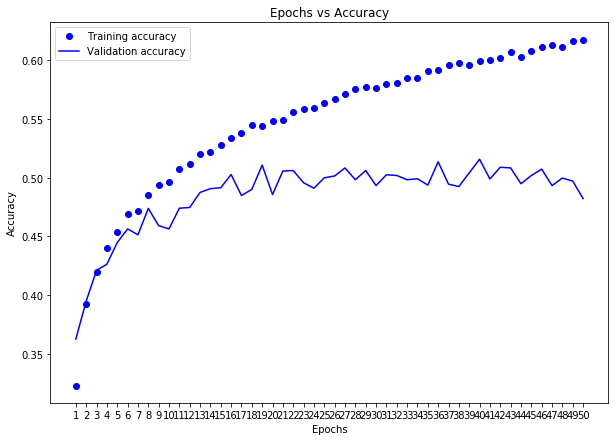

In [22]:
plot_history(history)

In [23]:
model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 0s 28us/sample - loss: 1.5380 - accuracy: 0.4864


[1.5379927715301513, 0.4864]

In [95]:
input_layer = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),padding="same")(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(32,(3,3),strides=2,padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64,(3,3),padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64,(3,3),strides=2,padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
x = Dense(128)(x)
X = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
output_layer = Dense(10,activation="softmax")(x)
model = Model(input_layer,output_layer)

In [96]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 16, 16, 32)        0   

In [97]:
model.compile(optimizer=Adam(),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [98]:
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    batch_size=64,
                    validation_data=(val_data,val_labels))

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 5s 108us/sample - loss: 1.6258 - accuracy: 0.4453 - val_loss: 1.3966 - val_accuracy: 0.5158
Epoch 2/10
45000/45000 [==============================] - 4s 92us/sample - loss: 1.1679 - accuracy: 0.5836 - val_loss: 1.2697 - val_accuracy: 0.5776
Epoch 3/10
45000/45000 [==============================] - 4s 91us/sample - loss: 1.0091 - accuracy: 0.6450 - val_loss: 1.1172 - val_accuracy: 0.6258
Epoch 4/10
45000/45000 [==============================] - 4s 90us/sample - loss: 0.9263 - accuracy: 0.6753 - val_loss: 0.9555 - val_accuracy: 0.6684
Epoch 5/10
45000/45000 [==============================] - 4s 92us/sample - loss: 0.8628 - accuracy: 0.6944 - val_loss: 0.9726 - val_accuracy: 0.6652
Epoch 6/10
45000/45000 [==============================] - 4s 91us/sample - loss: 0.8077 - accuracy: 0.7154 - val_loss: 0.9214 - val_accuracy: 0.6810
Epoch 7/10
45000/45000 [==============================] 

In [83]:
model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.9048 - accuracy: 0.7081


[0.9048374578475952, 0.7081]

In [88]:
traingen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
testgen = ImageDataGenerator()

In [89]:
train_generator = traingen.flow(train_data,
                         train_labels,
                         batch_size=64)
validation_generator = testgen.flow(val_data,
                                    val_labels,
                                    batch_size=64)

In [71]:
for x, y in train_generator:
    print(x.shape,y.shape)
    break

(64, 32, 32, 3) (64, 10)


In [90]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch=704,
                    workers=16,
                    max_queue_size=128,
                    validation_data=validation_generator,
                    validation_steps=79)

Epoch 1/10
704/704 [==============================] - 15s 22ms/step - loss: 1.9889 - accuracy: 0.3147 - val_loss: 1.5410 - val_accuracy: 0.4704
Epoch 2/10
704/704 [==============================] - 14s 20ms/step - loss: 1.6492 - accuracy: 0.4057 - val_loss: 1.6193 - val_accuracy: 0.4486
Epoch 3/10
704/704 [==============================] - 14s 20ms/step - loss: 1.5491 - accuracy: 0.4390 - val_loss: 1.5853 - val_accuracy: 0.4666
Epoch 4/10
704/704 [==============================] - 14s 20ms/step - loss: 1.4829 - accuracy: 0.4678 - val_loss: 1.2396 - val_accuracy: 0.5608
Epoch 5/10
704/704 [==============================] - 14s 20ms/step - loss: 1.4290 - accuracy: 0.4868 - val_loss: 1.2341 - val_accuracy: 0.5644
Epoch 6/10
704/704 [==============================] - 14s 20ms/step - loss: 1.3956 - accuracy: 0.4957 - val_loss: 1.3657 - val_accuracy: 0.5080
Epoch 7/10
704/704 [==============================] - 14s 20ms/step - loss: 1.3559 - accuracy: 0.5134 - val_loss: 1.6084 - val_accuracy:

In [91]:
model.evaluate(test_data,test_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 1.2074 - accuracy: 0.5909


[1.2073837730407715, 0.5909]

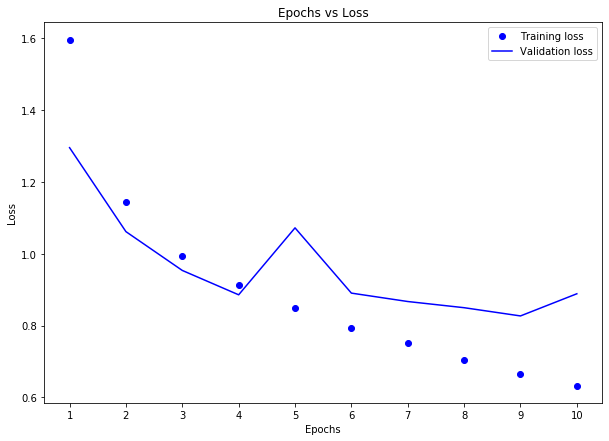

In [93]:
plot_history(history,"loss")